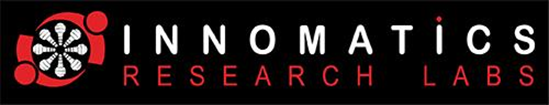

#                `` Data Collection , Data Cleaning and EDA Project``

### _Case Study Selection_

* **Project Title: Price analysis on `SMART TV'S`**
* **Use Case Domain: `Electronics`**
* **Team Size  : 2**
* **Member Names -  `@Saikiran Nune  @Ch ramesh`** 
* **Use Case Objective(Problem Statement): Analysis on price of `Smart TV's` based on there features.** 


### 2. Search for Relevant Websites 

In [ ]:
url = r'https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page={i}'

### 3. Define the problem Statement: 

### import the Required Libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

### Extract the Data

In [82]:
brand_name = []
model_name = []
Video_quality = []
length = []
prices = []
System1 = []                            #empty lists
year = []
#Prices1 = []
Ratings = []
opp = []
discount = []
opr = []
discount1 = []
riew_counts = []
ratings_counts = []
b = []

for i in range(1,31):        
    url = f'https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page={i}'
    print(url)
    
    requests.get(url,headers = {'User-Agent':'Mozilla/5.0'})   #requests paseed to the urls

    headers = {"Accept-Language": "en-US,en;q=0.9"}

    page=requests.get(url, headers=headers)
    
    soup = BeautifulSoup(page.text)   #using Beautifulsoup library we can extract the data
    
    content = soup.find_all('div',class_ = '_4rR01T')  
    
    for i in content:
        brands = i.find('div',class_ = '_4rR01T')
        
        regex = re.findall('^\w+',i.text)
        
        if len(regex) == 1:
            brand_name.append(regex[0])
        else:
            brand_name.append(np.nan)
            
            
        #model
        
        model = re.findall('cm\s\((\d+)',i.text)
        
        if len(model) == 1:
            model_name.append(model[0])
        else:
            model_name.append(np.nan)
            
        video = re.findall('HD\s\w+\s\w+|Ultra\s\w+',i.text)
        
        if len(video) ==  1:
            
            Video_quality.append(video[0])
            
        else:
            
            Video_quality.append(np.nan)
            
        cm = re.findall('(\d+\.?\d+)\scm',i.text)
        
        if len(cm) == 1:
            
            length.append(cm[0])
        else:
            
            length.append(np.nan)
            
       
            
        op = soup.find_all('div',class_ ='_3I9_wc _27UcVY')
        if op:
            opp.append(op[0])
        else:
            opp.append(np.nan)
            
        dis = soup.find_all('div',class_ = '_3Ay6Sb')
        if dis:
            discount.append(dis[0])
        else:
            discount.append(np.nan)
            
    content2 = soup.find_all('div',class_ = 'fMghEO')
    
    for i in content2:
        
        os = i.find('li',class_ = 'rgWa7D')
        
        regex = re.findall('Tizen|Android|Google|WebOS|Linux|Coolita|VIDAA|Fire',i.text)
        
        if len(regex) == 1:
            
            System1.append(regex[0])
            
        else:
            
            System1.append(np.nan)
            
        ly = i.find('li',class_ = 'rgWa7D')
        
        regex = re.findall('Year:\s(\d\d\d\d)',i.text)
        
        if len(regex) == 1:
            
            year.append(regex[0])
            
        else:
            
            year.append(np.nan)
            
            
    content3 = soup.find_all('div',class_ ='_2kHMtA')
    
    for i in  content3:
        
        p = i.find("div", class_="_30jeq3 _1_WHN1")
        if p:
            prices.append(p.text)
        else:
            prices.append(np.nan)
            
    content4 = soup.find_all('div',class_ ='_2kHMtA')
    
    for i in content4:
        
        op = i.find('div',class_ = '_3I9_wc _27UcVY')
        
        if op:
            opr.append(op.text)
        else:
            opr.append(np.nan)
        
        
    content5 = soup.find_all('div',class_ ='_2kHMtA')
    
    for i in content5:
        
        dis1 = i.find('div',class_ = '_3Ay6Sb')
        
        if dis1:
            discount1.append(dis1.text)
        else:
            discount1.append(np.nan)
            
    content6 = soup.find_all('div',class_ = '_3pLy-c row')
    for i in content6:
        rat  = i.find('div',class_ = '_3LWZlK')
        
        if rat:
            Ratings.append(rat.text)
        else:
            Ratings.append(np.nan)
            
        regex = re.findall('Ratings\s&\s(.*)Reviews',i.text)
        
        if len(regex) == 1:
            riew_counts.append(regex[0])
        else:
            riew_counts.append(np.nan)
            
        regex = re.findall('(\d+\,?\d+)\sRatings',i.text)
        
        if len(regex) == 1:
            ratings_counts.append(regex[0])
        else:
            ratings_counts.append(np.nan)
            
            
    content7 = soup.find_all('div',class_ = '_4rR01T')        
            
    for i in content7:
        b.append(i.text.split()[0])
            
        
            
        
            
            
            
            
            
       
                
            
            
            
            
            
            
        
            
    
    

https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page=1
https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page=2
https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360dabfb7&page=3
https://www.flipkart.com/search?q=tv&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_9_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_9_0_na_na_na&as-pos=9&as-type=TRENDING&suggestionId=tv&requestId=13dae110-8a35-4a3a-b198-5a7360da

#### _Cleaning the Data_

In [17]:
Original_price = [i.text for i in opp]

In [19]:
Discount = [i.text for i in discount]

In [45]:
Prices = []                # To remove'₹' character using l-Strip
for i in prices:
    Prices.append(i.lstrip('₹'))

In [46]:
opr_cleaned = [str(price).replace('₹', '') for price in opr]    #replacing (₹) - ('')with empty space

In [47]:
Prices = [i.replace(",","") for i in Prices]  # replacing (',')- ('') with empty space

In [48]:
opr_cleaned = [i.replace(",","") for i in opr_cleaned]        # replacing (',')- ('') with empty space

In [49]:
Discount = [str(i).strip('% off') for i in discount1]         # removing '% off' using strip

In [50]:
ratings_counts1 = [str(i).replace(",","") for i in ratings_counts]  # replacing (',')- ('') with empty space

In [51]:
riew_counts1 = [str(i).replace(",","") for i in riew_counts]        # replacing (',')- ('') with empty space

## ` _Create Data Frame_`

In [193]:
df = pd.DataFrame({'BRAND NAME':b,
                  'MODEL NAME(inch)':model_name,
                  'LENGTH(cm)':length,
                  'VIDEO QUALITY':Video_quality,
                  'PRICE':Prices,
                  'ORIGINAL_PRICE':opr_cleaned,
                  'DISCOUNT':Discount,
                  'LAUNCH YEAR':year,
                  'OPERATING SYSTEM':System1,
                  'RATINGS':Ratings,
                  'NO OF RIVEWS':riew_counts1,
                  'NO OF RATINGS':ratings_counts1})       #creating DataFrame (Dictionary Format)

In [194]:
df

BRAND NAME MODEL NAME(inch) LENGTH(cm) VIDEO QUALITY   PRICE  \
0      SAMSUNG               32         80  HD Ready LED   22999   
1      SAMSUNG               43        108      Ultra HD    7790   
2           LG               32         80  HD Ready LED   14490   
3           Mi               32         80  HD Ready LED    9999   
4      Thomson               32         80  HD Ready LED   12490   
..         ...              ...        ...           ...     ...   
715       SONY               55        139      Ultra HD   24590   
716  Blaupunkt               50        126      Ultra HD   31999   
717      KODAK               55        139      Ultra HD   22999   
718    SAMSUNG               55        138      Ultra HD   36490   
719    SAMSUNG               32         80  HD Ready LED  262999   

    ORIGINAL_PRICE DISCOUNT LAUNCH YEAR OPERATING SYSTEM RATINGS NO OF RIVEWS  \
0            42999       46        2022            Tizen     4.4         117    
1            27990       72        2023            Tizen     4.4         478    
2            24990       42        2020            WebOS     4.3         827    
3            17999       44        2023           Google     4.3       24083    
4            24999       50        2023          Android     4.3        3237    
..             ...      ...         ...              ...     ...          ...   
715          26999        8        2022           Google     NaN          nan   
716          44999       28        2023           Google     4.5       10715    
717          29999       23        2022           Google     4.6        3237    
718          54990       33        2021            Tizen     3.3          nan   
719         364990       27        2018              NaN       4          nan   

    NO OF RATINGS  
0           31312  
1           93242  
2           39424  
3           23015  
4          338471  
..            ...  
715           nan  
716         12400  
717        338471  
718           nan  
719           nan  

[720 rows x 12 columns]

### Export into.CSV format

In [196]:
df.to_csv('Smart Tv.csv')        #  TO Save the file into CSV format


### Read CSV file

In [3]:
df = pd.read_csv(r"C:\Users\saiki\python\WEBSCRAPING\smart Tv.csv")    # Read the CSV file 

In [4]:
df

Unnamed: 0 BRAND NAME  MODEL NAME(inch)  LENGTH(cm) VIDEO QUALITY  \
0             0    SAMSUNG                32        80.0  HD Ready LED   
1             1    SAMSUNG                43       108.0      Ultra HD   
2             2         LG                32        80.0  HD Ready LED   
3             3         Mi                32        80.0  HD Ready LED   
4             4    Thomson                32        80.0  HD Ready LED   
..          ...        ...               ...         ...           ...   
715         715       SONY                55       139.0      Ultra HD   
716         716  Blaupunkt                50       126.0      Ultra HD   
717         717      KODAK                55       139.0      Ultra HD   
718         718    SAMSUNG                55       138.0      Ultra HD   
719         719    SAMSUNG                32        80.0  HD Ready LED   

      PRICE  ORIGINAL_PRICE  DISCOUNT  LAUNCH YEAR OPERATING SYSTEM  RATINGS  \
0     22999         42999.0      46.0         2022            Tizen      4.4   
1      7790         27990.0      72.0         2023            Tizen      4.4   
2     14490         24990.0      42.0         2020            WebOS      4.3   
3      9999         17999.0      44.0         2023           Google      4.3   
4     12490         24999.0      50.0         2023          Android      4.3   
..      ...             ...       ...          ...              ...      ...   
715   24590         26999.0       8.0         2022           Google      NaN   
716   31999         44999.0      28.0         2023           Google      4.5   
717   22999         29999.0      23.0         2022           Google      4.6   
718   36490         54990.0      33.0         2021            Tizen      3.3   
719  262999        364990.0      27.0         2018              NaN      4.0   

     NO OF RIVEWS  NO OF RATINGS  
0           117.0        31312.0  
1           478.0        93242.0  
2           827.0        39424.0  
3         24083.0        23015.0  
4          3237.0       338471.0  
..            ...            ...  
715           NaN            NaN  
716       10715.0        12400.0  
717        3237.0       338471.0  
718           NaN            NaN  
719           NaN            NaN  

[720 rows x 13 columns]

In [148]:
df.info()        # information a bout data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        720 non-null    int64  
 1   BRAND NAME        720 non-null    object 
 2   MODEL NAME(inch)  720 non-null    int64  
 3   LENGTH(cm)        720 non-null    float64
 4   VIDEO QUALITY     718 non-null    object 
 5   PRICE             720 non-null    int64  
 6   ORIGINAL_PRICE    715 non-null    float64
 7   DISCOUNT          713 non-null    float64
 8   LAUNCH YEAR       720 non-null    int64  
 9   OPERATING SYSTEM  693 non-null    object 
 10  RATINGS           643 non-null    float64
 11  NO OF RIVEWS      650 non-null    float64
 12  NO OF RATINGS     650 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 73.3+ KB


### DATA CLEANING PROCESS

In [153]:
columns = df.columns     # columns Names

In [154]:
columns

Index(['Unnamed: 0', 'BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)',
       'VIDEO QUALITY', 'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

### _Columns_Rows_

In [94]:
Shape = df.shape       # Shape of a data set

In [95]:
print('Number of Columns:' , Shape[0])
print('Number of Rows:',Shape[1])

Number of Columns: 720
Number of Rows: 13


### _NULL VALUES_

In [96]:
import missingno   # import the library to visualize the null values

In [97]:
missingno.matrix(df)

<Axes: >

In [98]:
df.isna().sum()       # checking null values

Unnamed: 0           0
BRAND NAME           0
MODEL NAME(inch)     0
LENGTH(cm)           0
VIDEO QUALITY        2
PRICE                0
ORIGINAL_PRICE       5
DISCOUNT             7
LAUNCH YEAR          0
OPERATING SYSTEM    27
RATINGS             77
NO OF RIVEWS        70
NO OF RATINGS       70
dtype: int64

### _Data types_

In [99]:
df.dtypes      # Checking Data types

Unnamed: 0            int64
BRAND NAME           object
MODEL NAME(inch)      int64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE      float64
DISCOUNT            float64
LAUNCH YEAR           int64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS        float64
NO OF RATINGS       float64
dtype: object

### _Duplicates_

In [100]:
df

Unnamed: 0 BRAND NAME  MODEL NAME(inch)  LENGTH(cm) VIDEO QUALITY  \
0             0    SAMSUNG                32        80.0  HD Ready LED   
1             1    SAMSUNG                43       108.0      Ultra HD   
2             2         LG                32        80.0  HD Ready LED   
3             3         Mi                32        80.0  HD Ready LED   
4             4    Thomson                32        80.0  HD Ready LED   
..          ...        ...               ...         ...           ...   
715         715       SONY                55       139.0      Ultra HD   
716         716  Blaupunkt                50       126.0      Ultra HD   
717         717      KODAK                55       139.0      Ultra HD   
718         718    SAMSUNG                55       138.0      Ultra HD   
719         719    SAMSUNG                32        80.0  HD Ready LED   

      PRICE  ORIGINAL_PRICE  DISCOUNT  LAUNCH YEAR OPERATING SYSTEM  RATINGS  \
0     22999         42999.0      46.0         2022            Tizen      4.4   
1      7790         27990.0      72.0         2023            Tizen      4.4   
2     14490         24990.0      42.0         2020            WebOS      4.3   
3      9999         17999.0      44.0         2023           Google      4.3   
4     12490         24999.0      50.0         2023          Android      4.3   
..      ...             ...       ...          ...              ...      ...   
715   24590         26999.0       8.0         2022           Google      NaN   
716   31999         44999.0      28.0         2023           Google      4.5   
717   22999         29999.0      23.0         2022           Google      4.6   
718   36490         54990.0      33.0         2021            Tizen      3.3   
719  262999        364990.0      27.0         2018              NaN      4.0   

     NO OF RIVEWS  NO OF RATINGS  
0           117.0        31312.0  
1           478.0        93242.0  
2           827.0        39424.0  
3         24083.0        23015.0  
4          3237.0       338471.0  
..            ...            ...  
715           NaN            NaN  
716       10715.0        12400.0  
717        3237.0       338471.0  
718           NaN            NaN  
719           NaN            NaN  

[720 rows x 13 columns]

In [145]:
df.duplicated().sum()  #checking duplicate values

0

In [280]:
df.drop_duplicates(keep='first',inplace=True,ignore_index=True)     # Dropping the duplicate values

In [281]:
df

Unnamed: 0 BRAND NAME  MODEL NAME(inch)  LENGTH(cm) VIDEO QUALITY  \
0             0    SAMSUNG                32        80.0  HD Ready LED   
1             1    SAMSUNG                43       108.0      Ultra HD   
2             2         LG                32        80.0  HD Ready LED   
3             3         Mi                32        80.0  HD Ready LED   
4             4    Thomson                32        80.0  HD Ready LED   
..          ...        ...               ...         ...           ...   
715         715       SONY                55       139.0      Ultra HD   
716         716  Blaupunkt                50       126.0      Ultra HD   
717         717      KODAK                55       139.0      Ultra HD   
718         718    SAMSUNG                55       138.0      Ultra HD   
719         719    SAMSUNG                32        80.0  HD Ready LED   

      PRICE  ORIGINAL_PRICE  DISCOUNT  LAUNCH YEAR OPERATING SYSTEM  RATINGS  \
0     22999           42999        46         2022            Tizen      4.4   
1      7790           27990        72         2023            Tizen      4.4   
2     14490           24990        42         2020            WebOS      4.3   
3      9999           17999        44         2023           Google      4.3   
4     12490           24999        50         2023          Android      4.3   
..      ...             ...       ...          ...              ...      ...   
715   24590           26999         8         2022           Google      4.3   
716   31999           44999        28         2023           Google      4.5   
717   22999           29999        23         2022           Google      4.6   
718   36490           54990        33         2021            Tizen      3.3   
719  262999          364990        27         2018           Google      4.0   

     NO OF RIVEWS  NO OF RATINGS  
0             117          31312  
1             478          93242  
2             827          39424  
3           24083          23015  
4            3237         338471  
..            ...            ...  
715           489          23946  
716         10715          12400  
717          3237         338471  
718           489          23946  
719           489          23946  

[720 rows x 13 columns]

In [105]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [106]:
df.dtypes

BRAND NAME           object
MODEL NAME(inch)      int64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE      float64
DISCOUNT            float64
LAUNCH YEAR           int64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS        float64
NO OF RATINGS       float64
dtype: object

### Checking the  `_Noisy_Data_`

In [320]:
df['BRAND NAME'].unique()        # checking the Noisy data each and evry column 

array(['SAMSUNG', 'LG', 'Mi', 'Thomson', 'REDMI', 'Blaupunkt',
       'Panasonic', 'Acer', 'KODAK', 'MOTOROLA', 'SONY', 'TCL', 'Coocaa',
       'TOSHIBA', 'Haier', 'Hisense', 'Vu', 'MarQ', 'InnoQ', 'ONIDA',
       'iFFALCON', 'Infinix', 'Sansui', 'SENS', 'Compaq', 'BeethoSOL',
       'OnePlus', 'NU', 'Foxsky', 'realme', 'CANDY', 'Lloyd', 'PHILIPS',
       'Hyundai', 'Reliance', 'BPL', 'SKYTRON', 'RGL', 'ZEBRONICS',
       'IMPEX', 'V-SKY', 'DETEL', 'TRUSENSE', 'Candes', 'CORNEA',
       'INVANTER', 'Aiwa', 'MeerVision', 'iMEE'], dtype=object)

In [108]:
df['MODEL NAME(inch)'].unique()

array([ 32,  43,  50,  24,  40,  55,  65,  75,  86,  48,  70,  85,  49,
        42,  77, 120], dtype=int64)

In [109]:
df['LENGTH(cm)'].unique()

array([ 80.  , 108.  , 125.  ,  60.  , 100.  , 126.  , 102.  , 139.  ,
        80.01, 140.  , 138.  , 164.  , 127.  , 165.  , 189.  ,  79.97,
       109.  , 138.8 , 163.9 , 189.34, 218.  , 121.  , 163.  , 178.  ,
       100.3 , 215.  , 123.  ,  81.01, 177.  , 138.78, 106.  , 139.7 ,
       144.8 ,  81.  , 125.7 ,  98.  , 190.  ,  81.28, 109.22, 121.92,
       122.2 , 194.7 , 190.5 ,  80.04, 165.1 , 214.  , 305.  , 122.  ])

In [110]:
df['VIDEO QUALITY'].unique()

array(['HD Ready LED', 'Ultra HD', 'HD LED Smart', 'HD Ready Smart', nan],
      dtype=object)

In [111]:
df['PRICE'].unique()

array([ 22999,   7790,  14490,   9999,  12490,  29990,  31999,   6299,
        15490,  25999,  37999,   8299,  14999,  20999,  16999,  32999,
         8599,  11990,   8999,   6999,  26999,  15999,  30999,   9499,
        32490,  18999,  14990,  11499,  12990,   7999,  13980,  34999,
        26499,  44990,  25490,  39999,   7799,  36999,  23999,  24999,
        19999,  27990,  28999,  27999,  33999,  40990,   8499,  35999,
        29999,   9899,  25499,  41999,  25990,  56999,  42990,  23990,
        45490,  47999,  14499,  44999,  15990,  63640,  32990,  64990,
        57999,  24990,  19499,  19990,   8349, 119999,  57940,   6799,
        43990,  13999,  11999, 134990,  56990,  49999,  42999,  87990,
        69990,  55999,  34990,  65990,  12499,   5999,  30990,  10999,
         7599,   8399,  54999, 222900,  51990,  94990,  84999,  75990,
         7989, 119990,  79990,  46999,  12599,  51999,   5699, 294490,
       120999,  12290, 154990,  57990,  49990,  10799,   5949,  29490,
      

In [112]:
df['ORIGINAL_PRICE'].unique()

array([ 42999.,  27990.,  24990.,  17999.,  24999.,  54900.,  29999.,
        44999.,   9999.,  19990.,  54999.,  14999.,  26999.,  31999.,
        49999.,  18499.,  20999.,  16999.,  12499.,  43990.,  38990.,
        10999.,  28999.,  59999.,  14499.,  17000.,  47990.,  32999.,
        18900.,  69900.,  18999.,  73990.,  36990.,  20990.,  69999.,
        72900.,  37900.,  21000.,  41999.,  46999.,  35999.,  39990.,
        61990.,  51999., 119900.,  37000.,  59900.,  19999.,  28499.,
        54990.,  85990.,  56790.,  20000.,  46500.,  35990.,  23990.,
        33999.,  30000.,  99999.,  14990.,  64900.,  40000.,  71990.,
       140580.,  48990., 119980., 121990.,  49990.,  59990.,  99900.,
        64999.,  61900.,  52990., 114990.,  21999.,  65000.,  34990.,
        19000.,  45990., 230400.,  39999.,  18000.,  85900.,  70900.,
        41990.,  21490.,  42990., 222900.,  94990.,  79990.,  89999.,
        22900., 144900.,  62990., 124900.,  66990.,  84999.,  48999.,
        85000., 1099

In [113]:
df['DISCOUNT'].unique()

array([46., 72., 42., 44., 50., 45., 23., 28., 37., 22., 39., 30., 34.,
       43., 53., 47., 67., 58., 41., 48., 32., 20., 54., 35., 63., 78.,
       33., 38., 62., 40., 36., 49., 51., 71., 31., 55., 66., 25., 70.,
       74., 57., 52., 68., 60., 56., 65., 26., nan, 59., 27., 16., 19.,
       15.,  6., 18., 17., 11., 61., 29., 64., 14., 21.,  8., 24.,  3.])

In [114]:
df['LAUNCH YEAR'].unique()

array([2022, 2023, 2020, 2021, 2018, 2017, 2019, 2016, 2024], dtype=int64)

In [115]:
df['OPERATING SYSTEM'].unique()

array(['Tizen', 'WebOS', 'Google', 'Android', 'Linux', 'Fire', 'Coolita',
       'VIDAA', nan], dtype=object)

In [396]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [397]:
df['RATINGS'].unique()

array([4.4, 4.3, 4.2, 4.6, 4.5, 4.1, 3.9, 4.7, 4. , 3.8, 5. , 4.8, 3.7,
       3. , 3.5, 3.6, 3.3, 4.9])

In [398]:
df['NO OF RIVEWS'].unique()

array([  117,   478,   827, 24083,  3237,  4435, 10715,  4701,  2121,
        4154,  2771,   685,  5222,  6346,   137,   442,  1111,    80,
        9973,  3197,  1092,    31,  2441,   862,   652,   459,    54,
         172,   349,    79,   195,  9127,   186,   264,   303,   207,
         610,    71,    88,   572,   816,  9488,  6377,  1299,   638,
          69,   455,  1909,   451,  8569,  2080,    63,  2413,   527,
         489,   736,   239,   107,  3184,     6,  5490,   632,   428,
         218,    40,    16,    66, 47472,     9,  1188,   223,   138,
        1798,   375,    39,   237,  1710,   561,   379,   316,    17,
         154, 23623,   600,   295,  7846,   673,  1180,    98,   177,
         226,  3350,    34,  2683,    96,    13,    27,   151, 21159,
           0,   943,   686,    84,     5,     1,   659,    11,  8512,
          12,     2,    23,    29,   146,   170,     3,   329,  3330,
          24,  4145,     7,    97,    18,   687,  4132,     4,     8,
        6193,    33,

In [399]:
df['NO OF RATINGS'].unique()

array([ 31312,  93242,  39424,  23015, 338471, 443791,  12400, 430390,
        59618, 331202, 327493,  46424, 245198, 250868,   2934,  23946,
        29595,  41147,   1796,  24528, 616566,  17594,   3176, 218268,
        18493,  34442,  22342,   4726,   3833,  23002,   1560,  11616,
       537276,  21915,  21846,  32423,  21491,  63100,   3263,   3450,
        62761,  36257, 445856, 522458,  65037,  24914,   3590,  44067,
        38815,  22680, 161364, 322242,   2553, 413592,  33923,  34394,
         2511,  35102,  11816,   6594, 414473,    637, 326123,  24201,
        14470,  21330,   2314,   3128,   8479,  73784,    768,   4336,
        38567,  21819,  41031, 418281,  32241,   2272,  11705,  57272,
        23735,  53099,  41132,    390,  31473,  19482,  14462,  12643,
       386249,  54594,  47030,   7351,   4531,   3995,  11896, 339524,
         6170, 424838,   5343,    790,   4136,  31084,  22416,     85,
        56155,  37259,   4460,    326,   4127,    123,     26,  32985,
      

### _Identifying Outliers_

* **To find out the outliers in each contiouns data.**

In [143]:
df.plot(kind = 'box')    # To find out the outliers

<Axes: >

<Axes: >

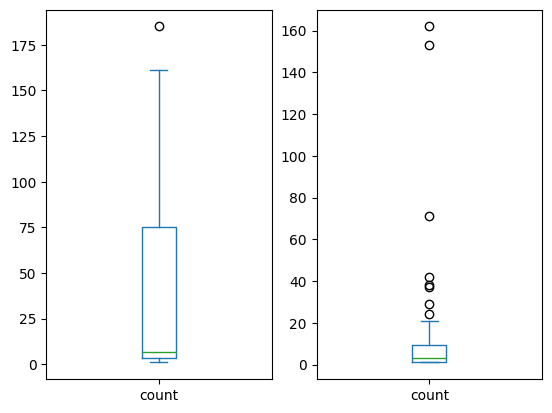

In [17]:
plt.subplot(1,2,1)
df['MODEL NAME(inch)'].value_counts().plot(kind = 'box')
plt.subplot(1,2,2)
df['LENGTH(cm)'].value_counts().plot(kind = 'box')

<Axes: >

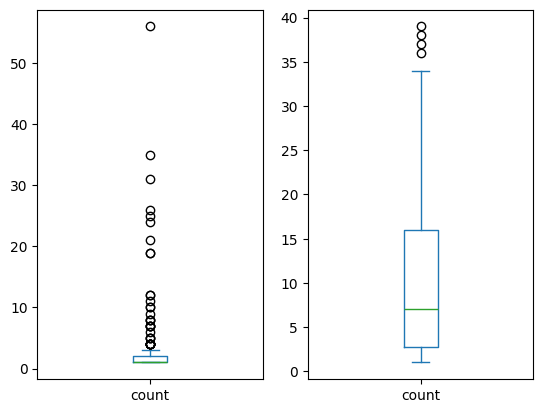

In [18]:
plt.subplot(1,2,1)
df['ORIGINAL_PRICE'].value_counts().plot(kind = 'box')
plt.subplot(1,2,2)
df['DISCOUNT'].value_counts().plot(kind = 'box')

<Axes: >

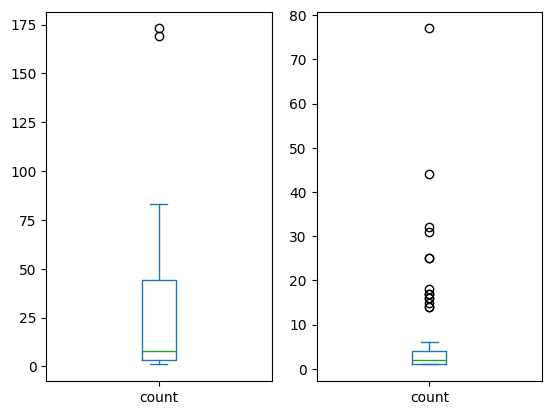

In [19]:
plt.subplot(1,2,1)
df['RATINGS'].value_counts().plot(kind = 'box')
plt.subplot(1,2,2)
df['NO OF RIVEWS'].value_counts().plot(kind = 'box')

<Axes: >

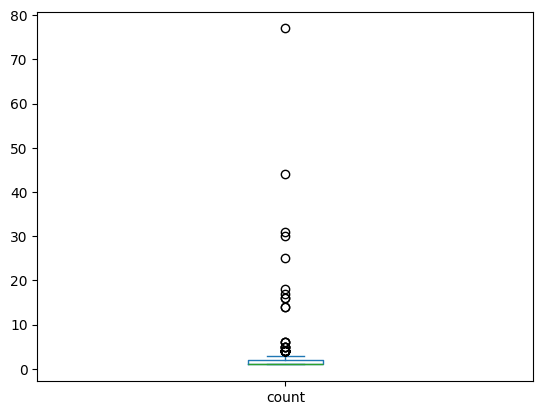

In [22]:
df['NO OF RATINGS'].value_counts().plot(kind = 'box')

### _Filling Null Values_

In [212]:
df.isna().sum()

Unnamed: 0           0
BRAND NAME           0
MODEL NAME(inch)     0
LENGTH(cm)           0
VIDEO QUALITY        2
PRICE                0
ORIGINAL_PRICE       5
DISCOUNT             7
LAUNCH YEAR          0
OPERATING SYSTEM    27
RATINGS             77
NO OF RIVEWS        70
NO OF RATINGS       70
dtype: int64

In [246]:
df['VIDEO QUALITY'].mode()[0]

'Ultra HD'

In [247]:
df['VIDEO QUALITY'] = df['VIDEO QUALITY'].fillna(df['VIDEO QUALITY'].mode()[0])  # filling null values with using 'fillna' function

In [248]:
df['ORIGINAL_PRICE'].median()

44999.0

In [249]:
df['ORIGINAL_PRICE'] = df['ORIGINAL_PRICE'].fillna(df['ORIGINAL_PRICE'].median())  # filling null values with using 'fillna' function

In [250]:
df['ORIGINAL_PRICE'].isna().sum()

0

In [251]:
df['DISCOUNT'].median()

42.0

In [252]:
df['DISCOUNT'] = df['DISCOUNT'].fillna(df['DISCOUNT'].median())    # filling null values with using 'fillna' function

In [253]:
df['DISCOUNT'].isna().sum()

0

In [254]:
df['OPERATING SYSTEM'].mode()[0]

'Google'

In [255]:
df['OPERATING SYSTEM'] = df['OPERATING SYSTEM'].fillna(df['OPERATING SYSTEM'].mode()[0])    # filling null values with using 'fillna' function

In [256]:
df['OPERATING SYSTEM'].isna().sum()

0

In [257]:
df['RATINGS'].median()

4.3

In [258]:
df['RATINGS'] = df['RATINGS'].fillna(df['RATINGS'].median())    # filling null values with using 'fillna' function

In [259]:
df['RATINGS'].isna().sum()

0

In [260]:
df['NO OF RIVEWS'].median()

489.0

In [261]:
df['NO OF RIVEWS'] = df['NO OF RIVEWS'].fillna(df['NO OF RIVEWS'].median())  # filling null values with using 'fillna' function

In [262]:
df['NO OF RIVEWS'].isna().sum()

0

In [263]:
df['NO OF RATINGS'].median()

23946.0

In [264]:
df['NO OF RATINGS'] = df['NO OF RATINGS'].fillna(df['NO OF RATINGS'].median())  # filling null values with using 'fillna' function

In [265]:
df['NO OF RATINGS'].isna().sum()

0

In [266]:
df.isna().sum() #checking null values wheather it is filled or not

Unnamed: 0          0
BRAND NAME          0
MODEL NAME(inch)    0
LENGTH(cm)          0
VIDEO QUALITY       0
PRICE               0
ORIGINAL_PRICE      0
DISCOUNT            0
LAUNCH YEAR         0
OPERATING SYSTEM    0
RATINGS             0
NO OF RIVEWS        0
NO OF RATINGS       0
dtype: int64

In [267]:
df.dtypes

Unnamed: 0            int64
BRAND NAME           object
MODEL NAME(inch)      int64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE      float64
DISCOUNT            float64
LAUNCH YEAR           int64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS        float64
NO OF RATINGS       float64
dtype: object

### _Remove Duplicates_

In [268]:
df.duplicated().sum()      # Removing the duplicates

0

In [269]:
df.drop_duplicates(keep='first',inplace=True)  # dropping the duplicates using 'drop_duplicates function'

In [270]:
df

Unnamed: 0 BRAND NAME  MODEL NAME(inch)  LENGTH(cm) VIDEO QUALITY  \
0             0    SAMSUNG                32        80.0  HD Ready LED   
1             1    SAMSUNG                43       108.0      Ultra HD   
2             2         LG                32        80.0  HD Ready LED   
3             3         Mi                32        80.0  HD Ready LED   
4             4    Thomson                32        80.0  HD Ready LED   
..          ...        ...               ...         ...           ...   
715         715       SONY                55       139.0      Ultra HD   
716         716  Blaupunkt                50       126.0      Ultra HD   
717         717      KODAK                55       139.0      Ultra HD   
718         718    SAMSUNG                55       138.0      Ultra HD   
719         719    SAMSUNG                32        80.0  HD Ready LED   

      PRICE  ORIGINAL_PRICE  DISCOUNT  LAUNCH YEAR OPERATING SYSTEM  RATINGS  \
0     22999         42999.0      46.0         2022            Tizen      4.4   
1      7790         27990.0      72.0         2023            Tizen      4.4   
2     14490         24990.0      42.0         2020            WebOS      4.3   
3      9999         17999.0      44.0         2023           Google      4.3   
4     12490         24999.0      50.0         2023          Android      4.3   
..      ...             ...       ...          ...              ...      ...   
715   24590         26999.0       8.0         2022           Google      4.3   
716   31999         44999.0      28.0         2023           Google      4.5   
717   22999         29999.0      23.0         2022           Google      4.6   
718   36490         54990.0      33.0         2021            Tizen      3.3   
719  262999        364990.0      27.0         2018           Google      4.0   

     NO OF RIVEWS  NO OF RATINGS  
0           117.0        31312.0  
1           478.0        93242.0  
2           827.0        39424.0  
3         24083.0        23015.0  
4          3237.0       338471.0  
..            ...            ...  
715         489.0        23946.0  
716       10715.0        12400.0  
717        3237.0       338471.0  
718         489.0        23946.0  
719         489.0        23946.0  

[720 rows x 13 columns]

In [271]:
df.duplicated().sum()

0

### _Type Casting_

In [272]:
df.dtypes       # To check the data types of a columns

Unnamed: 0            int64
BRAND NAME           object
MODEL NAME(inch)      int64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE      float64
DISCOUNT            float64
LAUNCH YEAR           int64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS        float64
NO OF RATINGS       float64
dtype: object

### Type Casting   -  `To convert the datatype into correct format by using Type Casting`

In [273]:
df['ORIGINAL_PRICE'] = df['ORIGINAL_PRICE'].astype('int64')  # to convert the float64 datatype to int64 datatype

In [274]:
df['DISCOUNT'] = df['DISCOUNT'].astype('int64')     # to convert the float64 datatype to int64 datatype

In [275]:
df['NO OF RIVEWS'] = df['NO OF RIVEWS'].astype('int64')    # to convert the float64 datatype to int64  datatype

In [276]:
df['NO OF RATINGS'] = df['NO OF RATINGS'].astype('int64')  # to convert the float64 datatype to int64 datatype

In [277]:
df.dtypes

Unnamed: 0            int64
BRAND NAME           object
MODEL NAME(inch)      int64
LENGTH(cm)          float64
VIDEO QUALITY        object
PRICE                 int64
ORIGINAL_PRICE        int64
DISCOUNT              int64
LAUNCH YEAR           int64
OPERATING SYSTEM     object
RATINGS             float64
NO OF RIVEWS          int64
NO OF RATINGS         int64
dtype: object

In [278]:
df

Unnamed: 0 BRAND NAME  MODEL NAME(inch)  LENGTH(cm) VIDEO QUALITY  \
0             0    SAMSUNG                32        80.0  HD Ready LED   
1             1    SAMSUNG                43       108.0      Ultra HD   
2             2         LG                32        80.0  HD Ready LED   
3             3         Mi                32        80.0  HD Ready LED   
4             4    Thomson                32        80.0  HD Ready LED   
..          ...        ...               ...         ...           ...   
715         715       SONY                55       139.0      Ultra HD   
716         716  Blaupunkt                50       126.0      Ultra HD   
717         717      KODAK                55       139.0      Ultra HD   
718         718    SAMSUNG                55       138.0      Ultra HD   
719         719    SAMSUNG                32        80.0  HD Ready LED   

      PRICE  ORIGINAL_PRICE  DISCOUNT  LAUNCH YEAR OPERATING SYSTEM  RATINGS  \
0     22999           42999        46         2022            Tizen      4.4   
1      7790           27990        72         2023            Tizen      4.4   
2     14490           24990        42         2020            WebOS      4.3   
3      9999           17999        44         2023           Google      4.3   
4     12490           24999        50         2023          Android      4.3   
..      ...             ...       ...          ...              ...      ...   
715   24590           26999         8         2022           Google      4.3   
716   31999           44999        28         2023           Google      4.5   
717   22999           29999        23         2022           Google      4.6   
718   36490           54990        33         2021            Tizen      3.3   
719  262999          364990        27         2018           Google      4.0   

     NO OF RIVEWS  NO OF RATINGS  
0             117          31312  
1             478          93242  
2             827          39424  
3           24083          23015  
4            3237         338471  
..            ...            ...  
715           489          23946  
716         10715          12400  
717          3237         338471  
718           489          23946  
719           489          23946  

[720 rows x 13 columns]

### Dropping the Unwanted columns

In [282]:
df.drop(columns='Unnamed: 0',inplace=True)

In [283]:
df

BRAND NAME  MODEL NAME(inch)  LENGTH(cm) VIDEO QUALITY   PRICE  \
0      SAMSUNG                32        80.0  HD Ready LED   22999   
1      SAMSUNG                43       108.0      Ultra HD    7790   
2           LG                32        80.0  HD Ready LED   14490   
3           Mi                32        80.0  HD Ready LED    9999   
4      Thomson                32        80.0  HD Ready LED   12490   
..         ...               ...         ...           ...     ...   
715       SONY                55       139.0      Ultra HD   24590   
716  Blaupunkt                50       126.0      Ultra HD   31999   
717      KODAK                55       139.0      Ultra HD   22999   
718    SAMSUNG                55       138.0      Ultra HD   36490   
719    SAMSUNG                32        80.0  HD Ready LED  262999   

     ORIGINAL_PRICE  DISCOUNT  LAUNCH YEAR OPERATING SYSTEM  RATINGS  \
0             42999        46         2022            Tizen      4.4   
1             27990        72         2023            Tizen      4.4   
2             24990        42         2020            WebOS      4.3   
3             17999        44         2023           Google      4.3   
4             24999        50         2023          Android      4.3   
..              ...       ...          ...              ...      ...   
715           26999         8         2022           Google      4.3   
716           44999        28         2023           Google      4.5   
717           29999        23         2022           Google      4.6   
718           54990        33         2021            Tizen      3.3   
719          364990        27         2018           Google      4.0   

     NO OF RIVEWS  NO OF RATINGS  
0             117          31312  
1             478          93242  
2             827          39424  
3           24083          23015  
4            3237         338471  
..            ...            ...  
715           489          23946  
716         10715          12400  
717          3237         338471  
718           489          23946  
719           489          23946  

[720 rows x 12 columns]

### _IT'S TIME  TO VISUALIZE THE DATA_

##  `Uni-Variate Analysis`

**continous**
* Histogram,
* Denisty plot,
* Box plot,
* Line chart

In [377]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM'],
      dtype='object')

### Histogram

* **To check the distribution of the Data**

In [51]:
sns.histplot(data = df,x = 'PRICE',hue='VIDEO QUALITY')

<Axes: xlabel='PRICE', ylabel='Count'>

**`Insights`**    --

* **Most of the `Smart TV's'` prices  Range from 5K to 1 LAKH.**

* **In our dataset there is a less number of Smart tv prices from 3LAKH to 5LAKH.**

* **As seen in this plot , The majority of `Video Quality` of Smart Tv is `ULTRA HD`**

* **The highest value count in price is around `90` and the lowest is `2`.**

* **There is no frequency(count) from  around (3.1lakh - 3.7lakh) and (4lakh - 4.5lakh).**

In [101]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [207]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ylabel('count')
df['OPERATING SYSTEM'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
sns.histplot(data = df, x = 'RATINGS',hue = 'OPERATING SYSTEM')

<Axes: xlabel='RATINGS', ylabel='Count'>

**`Insights`**  --

* **The Most number of `Ratings` from [4.1 - 4.7]**

* **less Number of Ratings from [3.0 - 3.9]**

* **In this plot highest rating is `5` and the lowest rating is `3`**

* **Most of the `Smart TV ` ratings are `4.3`**

* **There is no Ratings from `3.1` to `3.3`**

* **In this plot `Google` operating system  got more Ratings**

In [195]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

### Density PLot

* **`To check the  Distribution of the data`**

In [405]:
plt.figure(figsize=(15,5))
sns.displot(data = df,x = 'RATINGS',kind='kde',col='VIDEO QUALITY')

C:\Users\saiki\AppData\Local\Temp\ipykernel_8928\24224058.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = df,x = 'RATINGS',kind='kde',col='VIDEO QUALITY')


<Figure size 1200x400 with 0 Axes>

**`Insights`**  --

* **In this plot (fig-1) the `HD READY LED` has 4.0 to 4.5 ratings in the `VIDEO QUALITY` of `SMART TV`**

* **In this plot (fig-2) the `ULTRA HD` has 4.0 to 4.8 ratings in the `VIDEO QUALITY` of `SMART TV`**

* **In this plot (fig-3) the `HD LED SMART` has 4.0 to 4.5 ratings in the `VIDEO QUALITY` of `SMART TV`**

* **In this plot (fig-4) the `HD READY SMART` has no ratings in the `VIDEO QUALITY` of `SMART TV`**

### Box Plot

* **`To check the outliers`**

In [388]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [48]:
sns.boxplot(data = df,x = 'OPERATING SYSTEM',y = 'PRICE',palette='tab10')

C:\Users\saiki\AppData\Local\Temp\ipykernel_14420\845504401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df,x = 'OPERATING SYSTEM',y = 'PRICE',palette='tab10')


<Axes: xlabel='OPERATING SYSTEM', ylabel='PRICE'>

## _Categorical Data_

* Bar Plot
* Count Plot
* Pie Plot

### _Bar plot_

* **`To comapare and Display the frequency,count or proportions`.**

In [322]:
plt.style.use('classic')

In [177]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.ylabel('Count')
df['VIDEO QUALITY'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
ax = sns.scatterplot(data=df, x='RATINGS', y='PRICE', hue='VIDEO QUALITY')
sns.move_legend(ax, 'upper left',bbox_to_anchor=(1, 1) )

**`Insights`**  --

#### Fig-1

* **Most of the `SMART TV's` are having a  `ULTRA HD` video quality**

* **less number of `HD READY SMART` video quality in `SMART TV'S`**

#### Fig-2

* **`ULTRA HD` is the higest rated Video Quality and most ratings**

* **`ULTRA HD` has 5.0 rating Video Quality and its prices between 10k - 2lakh**

* **In this plot  Smart Tv with Ultra hd(4.3) video quality is more expensive above  4 lakh**

* **`HD READY SMART` has no ratings**

* **`ULTRA HD` ratings [3.0-5.0]**
* **`HD READY SMART` ratings [3.8-4.6]**
* **`HD LED SMART` ratings [3-4.75]**

**`HD READY SMART` ratings [3.8-4.6] and its prices between[10k-2.7lakh]**

**`HD LED SMART` ratings [3.0-4.75] and its prices between[10k-3lakh]**

## _Count Plot_

* **`Counts of Unique Values`**

<Figure size 1500x500 with 0 Axes>

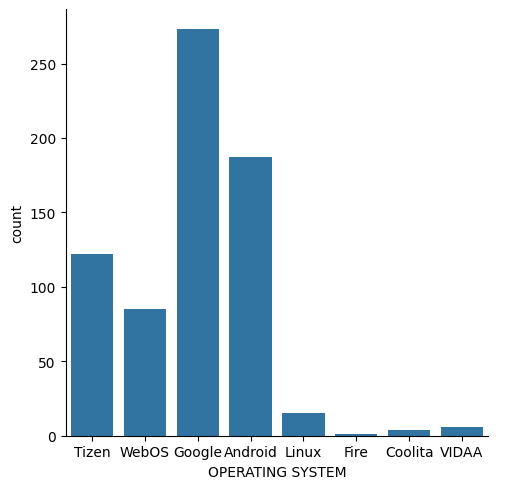

In [52]:
plt.figure(figsize=(15,5))
sns.catplot(data = df,x = 'OPERATING SYSTEM',kind='count')

**`Insights`**  --

* **In this plot , Most of the `SMART TV'S` are having a `GOOGLE` Operating System**

* **`FIRE` operating system had least count**

### _Pie Chart_

* `Percentile of Parts`.

In [291]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [72]:
df['VIDEO QUALITY'].value_counts()

VIDEO QUALITY
Ultra HD          469
HD Ready LED      166
HD LED Smart       82
HD Ready Smart      1
Name: count, dtype: int64

In [95]:
val = [0.1,0.1,0.1,0.1]

In [96]:
plt.pie(df['VIDEO QUALITY'].value_counts(),labels=['Ultra HD','HD Ready LED','HD LED Smart','HD Ready Smart'],autopct="%.if",shadow=True,explode = val)
plt.show()

**`Insights`**  --

####  **In this Pie Chart,We are showing `VIDEO QUALITY`**

* **65% of Smart tv Video Quality is `ULTRA HD`**

* **23% of Smart tv Video Quality is `HD READY LED`**

* **11% of Smart tv Video Quality is `HD LED SMART`**

* **0% of Smart tv Video Quality is `HD READY SMART`**

## _Bi-Variate Analysis_

### _Categorical vs Categorical_

In [304]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

### ` _Cross Tab_`

In [154]:
pd.crosstab(df['BRAND NAME'],df['VIDEO QUALITY'],margins=True)

VIDEO QUALITY  HD LED Smart  HD Ready LED  HD Ready Smart  Ultra HD  All
BRAND NAME                                                              
Acer                      2             2               1        13   18
Aiwa                      0             0               0         1    1
BPL                       1             1               0         0    2
BeethoSOL                 0             4               0         0    4
Blaupunkt                 5            33               0        60   98
CANDY                     1             1               0         1    3
CORNEA                    0             0               0         2    2
Candes                    0             2               0         1    3
Compaq                    3             0               0         2    5
Coocaa                    2             2               0         2    6
DETEL                     2             0               0         0    2
Foxsky                    0             2               0         0    2
Haier                     0             2               0         6    8
Hisense                   0             1               0        17   18
Hyundai                   1             0               0         2    3
IMPEX                     2             0               0         1    3
INVANTER                  1             0               0         1    2
Infinix                   2             0               0         2    4
InnoQ                     2             6               0         0    8
KODAK                     2             4               0        28   34
LG                        4             9               0        61   74
Lloyd                     1             1               0         5    7
MOTOROLA                  2             0               0         8   10
MarQ                      1             2               0         0    3
MeerVision                0             1               0         0    1
Mi                       31             6               0        40   77
NU                        0             1               0         3    4
ONIDA                     0             1               0         3    4
OnePlus                   1             0               0         1    2
PHILIPS                   0             0               0         1    1
Panasonic                 0            31               0         7   38
REDMI                     0             1               0        30   31
RGL                       1             0               0         0    1
Reliance                  0             1               0         0    1
SAMSUNG                   1            35               0        87  123
SENS                      1             1               0         2    4
SKYTRON                   2             1               0         2    5
SONY                      0             2               0        34   36
Sansui                    1             2               0         6    9
TCL                       0             1               0        20   21
TOSHIBA                   1             0               0         5    6
TRUSENSE                  0             0               0         1    1
Thomson                   4             6               0         4   14
V-SKY                     1             1               0         0    2
Vu                        1             0               0         4    5
ZEBRONICS                 1             1               0         0    2
iFFALCON                  0             1               0         4    5
iMEE                      0             0               0         1    1
realme                    2             1               0         1    4
All                      82           166               1       469  718

### `_Continous Data vs Continous Data_`

In [306]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

In [307]:
df

BRAND NAME  MODEL NAME(inch)  LENGTH(cm) VIDEO QUALITY   PRICE  \
0      SAMSUNG                32        80.0  HD Ready LED   22999   
1      SAMSUNG                43       108.0      Ultra HD    7790   
2           LG                32        80.0  HD Ready LED   14490   
3           Mi                32        80.0  HD Ready LED    9999   
4      Thomson                32        80.0  HD Ready LED   12490   
..         ...               ...         ...           ...     ...   
715       SONY                55       139.0      Ultra HD   24590   
716  Blaupunkt                50       126.0      Ultra HD   31999   
717      KODAK                55       139.0      Ultra HD   22999   
718    SAMSUNG                55       138.0      Ultra HD   36490   
719    SAMSUNG                32        80.0  HD Ready LED  262999   

     ORIGINAL_PRICE  DISCOUNT  LAUNCH YEAR OPERATING SYSTEM  RATINGS  \
0             42999        46         2022            Tizen      4.4   
1             27990        72         2023            Tizen      4.4   
2             24990        42         2020            WebOS      4.3   
3             17999        44         2023           Google      4.3   
4             24999        50         2023          Android      4.3   
..              ...       ...          ...              ...      ...   
715           26999         8         2022           Google      4.3   
716           44999        28         2023           Google      4.5   
717           29999        23         2022           Google      4.6   
718           54990        33         2021            Tizen      3.3   
719          364990        27         2018           Google      4.0   

     NO OF RIVEWS  NO OF RATINGS  
0             117          31312  
1             478          93242  
2             827          39424  
3           24083          23015  
4            3237         338471  
..            ...            ...  
715           489          23946  
716         10715          12400  
717          3237         338471  
718           489          23946  
719           489          23946  

[720 rows x 12 columns]

### Scatterplot

* **`Relation between two continous Variables`.**

<Axes: xlabel='ORIGINAL_PRICE', ylabel='PRICE'>

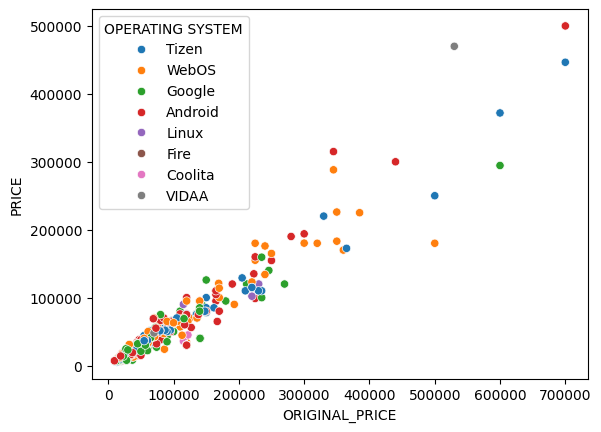

In [105]:
sns.scatterplot(data = df,x = 'ORIGINAL_PRICE' ,y = 'PRICE',hue='OPERATING SYSTEM')

**`Insights`**  --

* **The relationship between `PRICE` and `ORIGINAL_PRICE` ---  [`POSITIVELY STRONG RELATIONSHIP`]**

* **if Original_price increses price also increses**

In [309]:
df.columns

Index(['BRAND NAME', 'MODEL NAME(inch)', 'LENGTH(cm)', 'VIDEO QUALITY',
       'PRICE', 'ORIGINAL_PRICE', 'DISCOUNT', 'LAUNCH YEAR',
       'OPERATING SYSTEM', 'RATINGS', 'NO OF RIVEWS', 'NO OF RATINGS'],
      dtype='object')

<Axes: xlabel='OPERATING SYSTEM'>

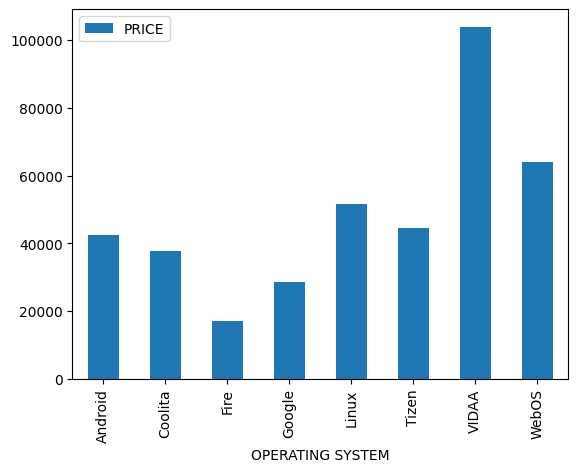

In [179]:

pd.pivot_table(data = df,index='OPERATING SYSTEM',values = 'PRICE',aggfunc='mean').plot(kind = 'bar')

**`Insights`**  --

* **`VIDAA` operating system is the highest price around 1 Lakh**

* **`FIRE` operating system is the lowest price 20k**

### `Categorical vs Numerical`

* bar plot,
* box plot,
* violon,

### BOX-PLOT   :     `Identifying Outliers`

C:\Users\saiki\AppData\Local\Temp\ipykernel_14420\2379704779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df, x = 'VIDEO QUALITY',y = 'RATINGS',kind='box',palette='hls')


<Figure size 1800x800 with 0 Axes>

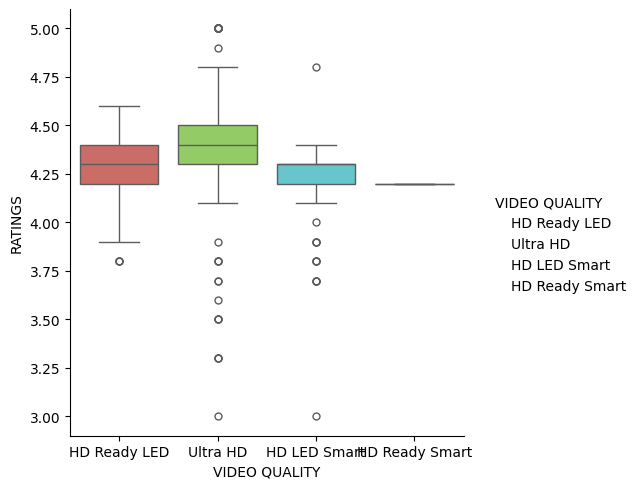

In [113]:
plt.figure(figsize=(18,8))
sns.catplot(data = df, x = 'VIDEO QUALITY',y = 'RATINGS',kind='box',palette='hls')

* **The middle portion represents the `Inter-quartile-range(IQR)`**
* **Middle line represents the `median` of the data**
* **circles represents the `outliers`**

* **Lower limit of `HD READY LED` is around `3.8` and upper limit of `HD READY LED` is around `4.6`.**

* **Lower limit of `ULTRA HD` is around `4.1` and upper limit of `ULTRA HD` is around `4.8`.**

* **Lower limit of `HD LED SMART` is around `4.1` and upper limit of `HD LED SMART` is around `4.4`.**

### BAR-PLOT   : `Bar plots are primarily used to compare different categories`

<Figure size 1500x1000 with 0 Axes>

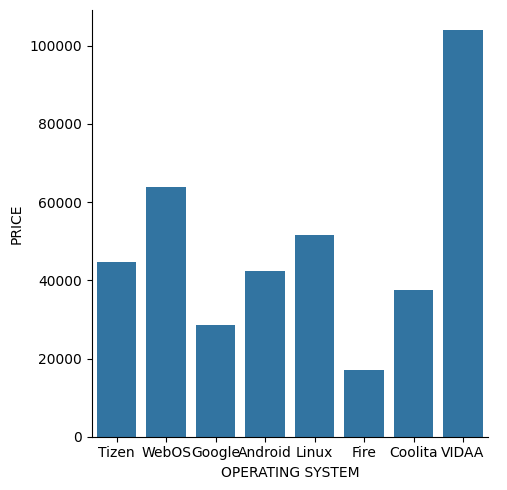

In [160]:
plt.figure(figsize=(15,10))
sns.catplot(data = df , x = 'OPERATING SYSTEM',y = 'PRICE',kind='bar', errorbar=None)

**`Insights`**  --

* **here we are comparing `OPERATING SYSTEM`(Categorical data) and `PRICE`(Continous data).**

* **In this plot shows the most expensive operating system is `VIDAA` and its price is around 1 lakh**

* **Lowest price of operating stsyem is `FIRE`**

## _Multi-Variate Analysis_

* Heat Map
* Pair Plot

### Heat-Map

* **`Quantifies and display Relation between multiple variables`**

In [379]:
df.corr(numeric_only=True)

MODEL NAME(inch)  LENGTH(cm)     PRICE  ORIGINAL_PRICE  \
MODEL NAME(inch)          1.000000    0.999415  0.223720        0.215319   
LENGTH(cm)                0.999415    1.000000  0.222240        0.214132   
PRICE                     0.223720    0.222240  1.000000        0.944730   
ORIGINAL_PRICE            0.215319    0.214132  0.944730        1.000000   
DISCOUNT                 -0.090902   -0.090855 -0.228385       -0.051217   
LAUNCH YEAR              -0.123134   -0.124487 -0.168117       -0.149812   
RATINGS                   0.139068    0.138549 -0.111526       -0.136599   
NO OF RIVEWS             -0.182921   -0.183533 -0.127046       -0.154238   
NO OF RATINGS            -0.141057   -0.141108 -0.115238       -0.131604   

                  DISCOUNT  LAUNCH YEAR   RATINGS  NO OF RIVEWS  NO OF RATINGS  
MODEL NAME(inch) -0.090902    -0.123134  0.139068     -0.182921      -0.141057  
LENGTH(cm)       -0.090855    -0.124487  0.138549     -0.183533      -0.141108  
PRICE            -0.228385    -0.168117 -0.111526     -0.127046      -0.115238  
ORIGINAL_PRICE   -0.051217    -0.149812 -0.136599     -0.154238      -0.131604  
DISCOUNT          1.000000     0.076598 -0.003157     -0.218755      -0.155122  
LAUNCH YEAR       0.076598     1.000000 -0.003068      0.154748       0.086511  
RATINGS          -0.003157    -0.003068  1.000000     -0.016372      -0.065723  
NO OF RIVEWS     -0.218755     0.154748 -0.016372      1.000000       0.158991  
NO OF RATINGS    -0.155122     0.086511 -0.065723      0.158991       1.000000

<Axes: >

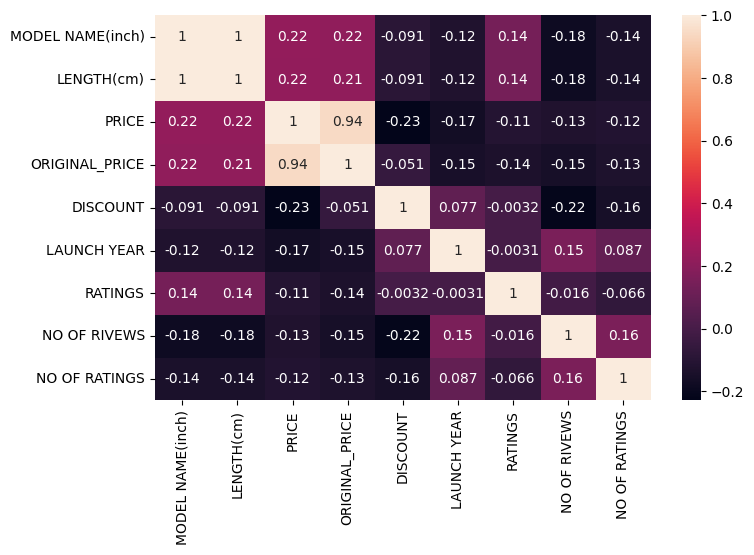

In [316]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True)

**`Insights`**  --

* **The relationship between `PRICE` and `MODEL NAME(inch)` Positive weak relationship.**

* **if `MODEL NAME(inch)` increses automatically `PRICE` also increases.**`

* **The Realationship between `PRICE` and `DISCOUNT` Negative weak Relationship.**

* **if `DISCOUNT` increses Automatically `PRICE` will be Decreses.**

* **The Relationship Between `MODEL NAME` and `RATINGS` positive weak relationship.**

* **If we gave good ratings on that model or brand obviously brand sales are increses.**

###  **_`correlation plot`_**

<Axes: >

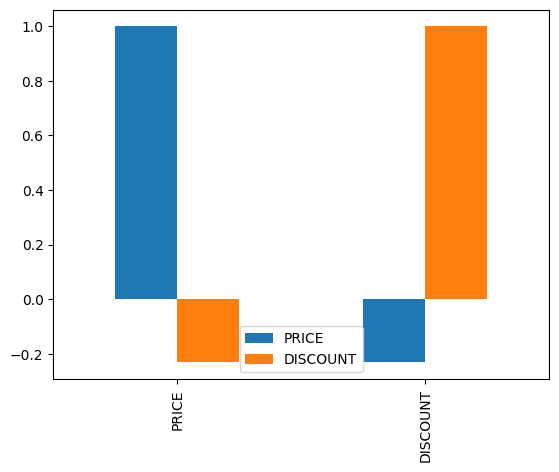

In [139]:
df[['PRICE','DISCOUNT']].corr().plot(kind = 'bar')

#### Inversily proportional

* **If Discount Decreses price will be increses.**
* **If Discount increses price will be Decreses**

### _By using Groupby_

* **groupby() function is used to split the data into groups based on some criteria.**

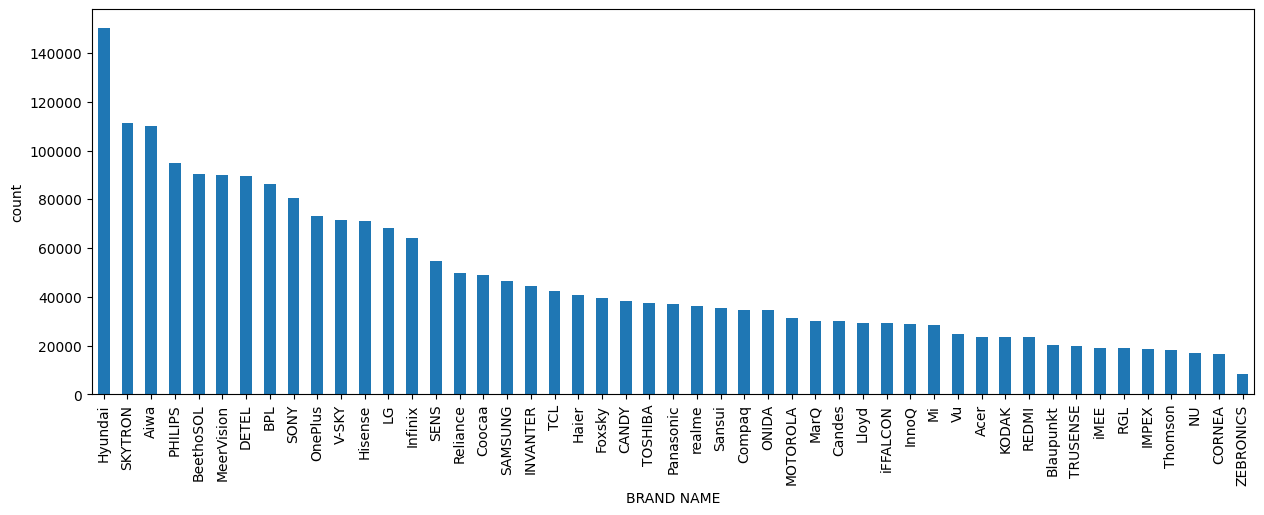

In [181]:
plt.figure(figsize=(15,5))
plt.ylabel('count')
df.groupby(by = ['BRAND NAME'])['PRICE'].mean().sort_values(ascending= False).plot(kind='bar')
plt.show()

* **In this plot the average prices of each and every brand.**

* **Only one brand more then 14k average price.**
* **Remaining all brands are less than 12k**

   ###                                           `_WEB SCRAPING AND EDA PROJECT_`

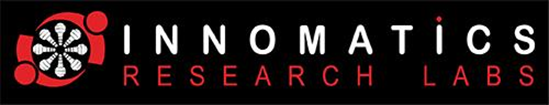